In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Telecom_Customer_Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.drop(columns="customerID",inplace=True)

In [8]:
df["TotalCharges"]=df["TotalCharges"].str.replace(" ","0")

In [9]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [10]:
df["TotalCharges"].mean()

np.float64(2279.7343035638223)

In [11]:
df["TotalCharges"]=df["TotalCharges"].replace(0,2279.73)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Churn Distribution'}, ylabel='count'>

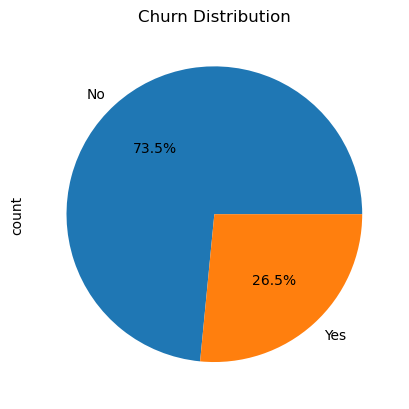

In [13]:
df["Churn"].value_counts().plot(kind="pie",autopct="%1.1f%%",title="Churn Distribution")

<Axes: title={'center': 'Gender-Wise Churn Distribution'}, ylabel='count'>

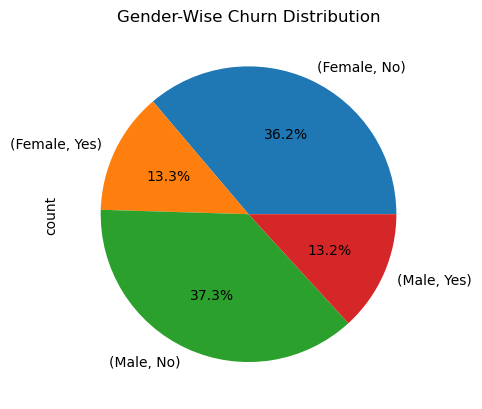

In [14]:
df.groupby("gender")["Churn"].value_counts().plot(kind="pie",autopct="%1.1f%%",title="Gender-Wise Churn Distribution")

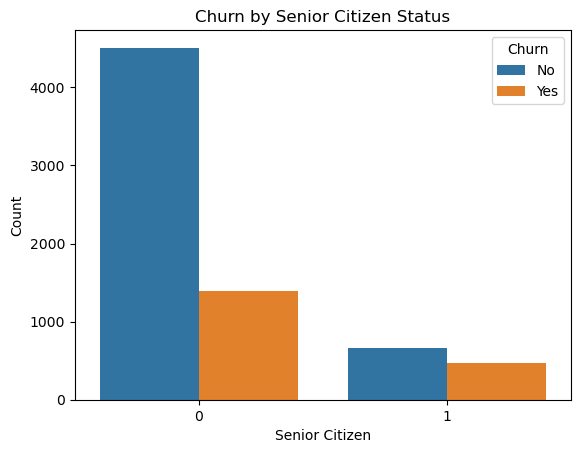

In [15]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Churn w.r.t Internet Service')

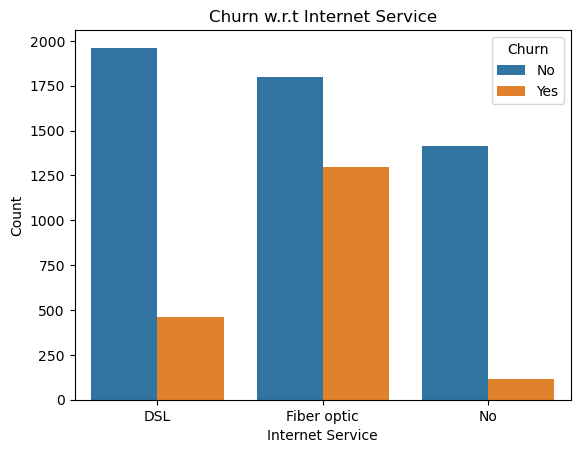

In [16]:
sns.countplot(x="InternetService",hue="Churn",data=df)
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Churn w.r.t Internet Service")

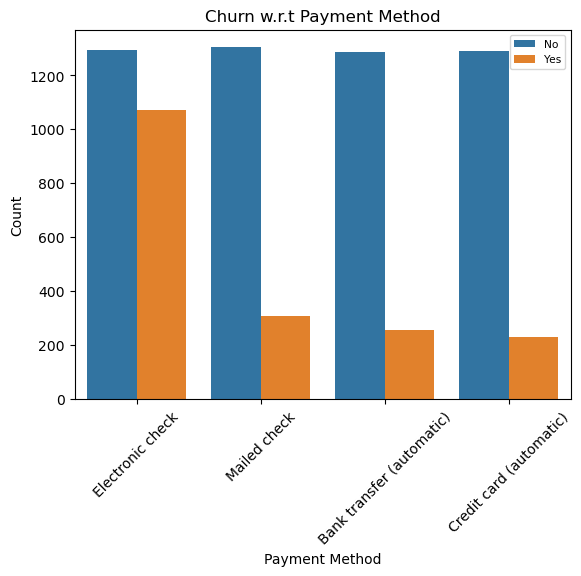

In [17]:
sns.countplot(x="PaymentMethod",hue="Churn",data=df)
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Churn w.r.t Payment Method")
plt.legend(fontsize=7.7)
plt.show()

In [18]:
Ch=df[df["Churn"]=="Yes"].value_counts().sum()
Ch

np.int64(1869)

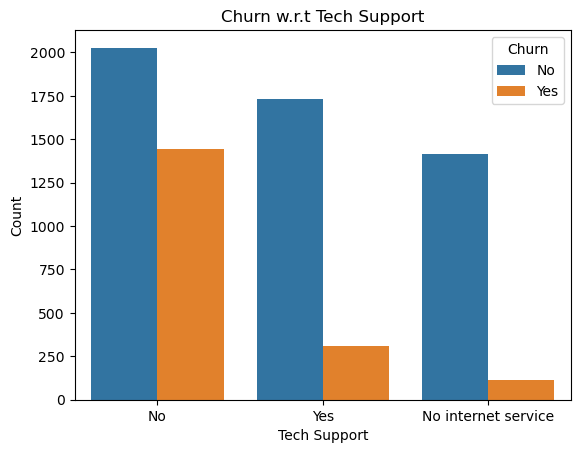

In [19]:
sns.countplot(data=df,x="TechSupport",hue="Churn")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.title("Churn w.r.t Tech Support")
plt.show()

In [20]:
cor=df[["tenure","TotalCharges"]].corr()
cor

,tenure,TotalCharges
tenure,1.000000,0.824761
TotalCharges,0.824761,1.000000


Text(0.5, 1.0, 'Churn w.r.t Tenure')

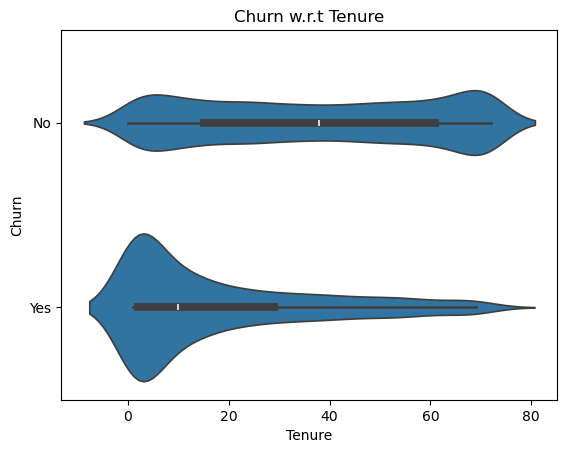

In [21]:
sns.violinplot(data=df,x="tenure",y="Churn")
plt.xlabel("Tenure")
plt.title("Churn w.r.t Tenure")

Text(0.5, 1.0, 'Churn w.r.t Total Charges')

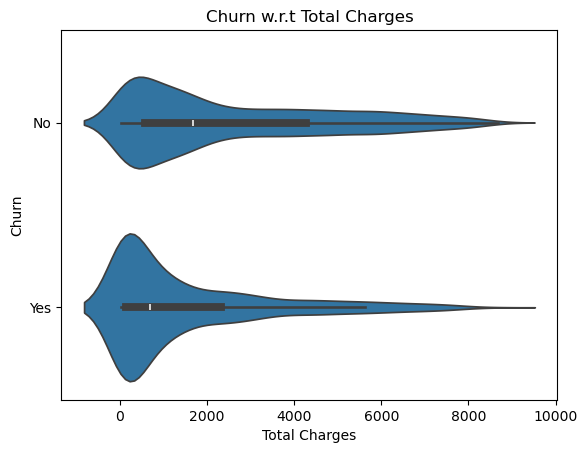

In [22]:
sns.violinplot(data=df,x="TotalCharges",y="Churn")
plt.xlabel("Total Charges")
plt.title("Churn w.r.t Total Charges")

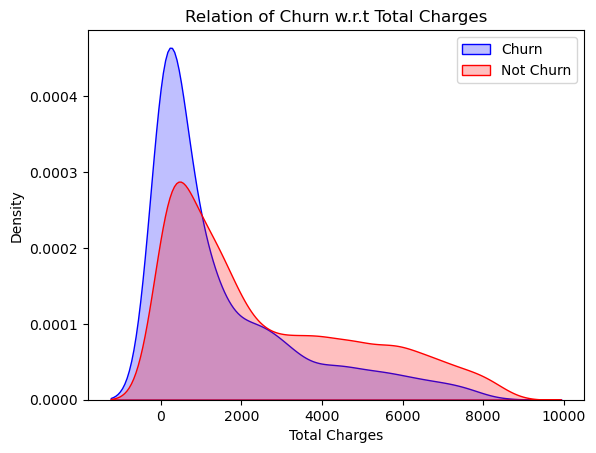

In [40]:
plot=sns.kdeplot(df["TotalCharges"][df["Churn"]=="Yes"],fill=True,color="Blue")
plot=sns.kdeplot(df["TotalCharges"][df["Churn"]=="No"],fill=True,color="Red")
plt.xlabel("Total Charges")
plt.title("Relation of Churn w.r.t Total Charges")
plt.legend(["Churn","Not Churn"],loc="upper right")

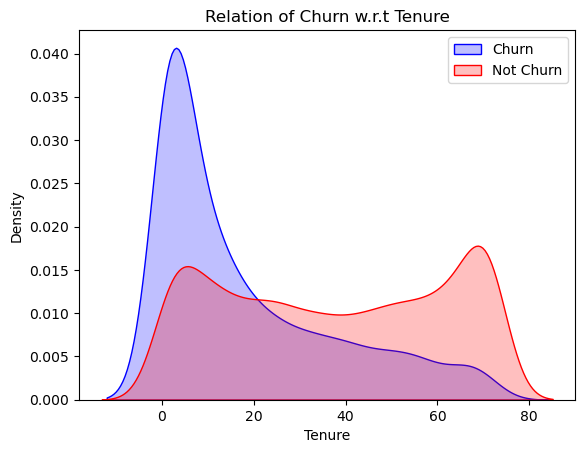

In [41]:
plot=sns.kdeplot(df["tenure"][df["Churn"]=="Yes"],fill=True,color="Blue")
plot=sns.kdeplot(df["tenure"][df["Churn"]=="No"],fill=True,color="Red")
plt.xlabel("Tenure")
plt.title("Relation of Churn w.r.t Tenure")
plt.legend(["Churn","Not Churn"],loc="upper right")